In [272]:



# import picture
# harris corner 
# convolution
# show the result in the bound
# show plt



In [273]:
from mat4py import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

In [274]:
def average_point(ori_point):
    distance=4
    #sort column 0 then column 1
    idex = np.lexsort([ori_point[:, 1], ori_point[:, 0]])
    sorted_p = ori_point[idex, :]
    #sorted_p=np.vstack((sorted_p,[0,0]))
    reference=sorted_p[0]
    list_a=[]
    array_48=[]
    for i in range(len(sorted_p)):
        norm=np.linalg.norm(sorted_p[i] - reference)
        #print(norm)
        if norm <distance and i!=len(sorted_p)-1:
            list_a.append(sorted_p[i])
           
        else :  
            reference=sorted_p[i]
            mean_value= sum(list_a) / float(len(list_a))
            array_48.append(mean_value)
            list_a=[]
            
    array_48=np.array(array_48)        
    return array_48

In [275]:
# part 1.5 

def filter_p(ori_point,I_bin):
    new_point=[]
    detect_size=3
    
    for i in range(len(ori_point)):
        x=ori_point[i,1]
        y=ori_point[i,0]
        x=int(x)
        y=int(y)
        if x in range(detect_size,width-detect_size) and y in range(detect_size,height-detect_size):
            p_1=I_bin[y-detect_size,x-detect_size]
            p_2=I_bin[y-detect_size,x+detect_size]
            p_3=I_bin[y+detect_size,x+detect_size]
            p_4=I_bin[y+detect_size,x-detect_size]
            if (p_1==p_3) and (p_2==p_4) and (p_2*p_4)!=(p_1*p_3) :
                new_point.append(ori_point[i])
    new_point=np.array(new_point)
    
    return new_point
    
# filter point (y,x)
filter_point=filter_p(point_array,I_binary)



In [276]:
def saddle(filter_point,I):
    sdpoint_arr=np.empty((0,2)) 
    for i in range(len(filter_point)):
        # saddle point position
        sdpoint_x=filter_point[i][1]
        sdpoint_y=filter_point[i][0]

    #     a1=sdpoint_x-patch_size/2
    #     a2=sdpoint_x+patch_size/2
    #     a3=sdpoint_y-patch_size/2
    #     a4=sdpoint_y+patch_size/2
    #     print(a1,a2,a3,a4)
    #  do the saddle point based on I_binary
        patch=I[int(sdpoint_y-patch_size/2):int(sdpoint_y+patch_size/2),int(sdpoint_x-patch_size/2):int(sdpoint_x+patch_size/2)]
        m, n = patch.shape 
        #clear B
        B=[]
        # x2 xy y2 x y 1 (m,n) begin from 0,0
        A = np.empty((0, 6))
        for x in range(0,n):
            for y in range(0,m):
                A = np.vstack((A, [x ** 2, x * y, y ** 2, x, y, 1.]))
                B.append(patch[y, x])
        # w=(a,b,c,d,e,f) for parameters
        w = np.linalg.lstsq(A, B,rcond=None)[0]
        #print(w)
        (a, b, c, d, e, f) = w
        # solve the intersection
        # [2a b],[b 2c]
        C = np.array([[float(2 * a), float(b)], [float(b), float(2 * c)]])
        D = np.array([-d, -e])
        pt = np.linalg.inv(C).dot(D)
        # correct the position of pt
        #print(pt.shape)
        pt=pt-[patch_size/2,patch_size/2]+[sdpoint_x,sdpoint_y]
        pt=pt.reshape((1,2))
        #print(pt)(x,y)
        sdpoint_arr=np.append(sdpoint_arr,pt,axis=0)
        
        #print(sdpoint_arr.shape) #(n,2)
    sdpoint_arr=sdpoint_arr[:, [1,0]]
    return sdpoint_arr



In [277]:
from scipy.ndimage.filters import *

In [278]:
def cross_junctions(I, bounds, Wpts):

    #part one
    #change to binary
    I_binary=np.where(I>100,0,1)
    plt.imshow(I_binary)
    #gaussian_filter filter
    I_gaussian=gaussian_filter(I,sigma=1)


    I_copy=I.copy()

    # harris corner
    # calculate gradient

    Ix,Iy= np.gradient(I_binary)
    Ix=gaussian_filter(Ix, sigma=1)
    Iy=gaussian_filter(Iy, sigma=1)

    # 2d array
    Ixx = Ix**2
    Ixy = Iy*Ix
    Iyy = Iy**2

    # Ixx=gaussian_filter(Ixx, sigma=2)
    # Ixy=gaussian_filter(Ixy, sigma=2)
    # Iyy=gaussian_filter(Iyy, sigma=2)
    height = I_binary.shape[0] #480
    width = I_binary.shape[1]  #640



    k = np.array([[1,1,1],[1,1,1],[1,1,1]])

    Sxx=convolve(Ixx, k, mode='nearest')
    Sxy=convolve(Ixy, k, mode='nearest')
    Syy=convolve(Iyy, k, mode='nearest')


    det = (Sxx * Syy) - (Sxy**2)
    trace = Sxx + Syy
    r = det - 0.04*(trace**2)

    #array_np = np.array(r)
    low_values_flags = r <0  # Where values are low
    r[low_values_flags] = 0 

    # max=np.amax(r)
    # print(max)

    # print(array_np)(y,x)
    point_array=[]
    ## show the plot
    for i in range(r.shape[0]):
        for j in range(r.shape[1]):
            if r[i,j]!=0:
                I_copy[i,j]=255 
                point_array.append([i,j])

    point_array=np.array(point_array)
    #I = imread("example_target.png")
    #plt.imshow(I_copy)
    ## change kernal, or change 

    #point_array is integer listxxxx turn to be a numpy array

    # plt.imshow(I)
    # #x, y
    # plt.plot([100,200],[200,300],'ro', color='b',)



#     plt.imshow(I)
#     #filter_point (y,x)
#     #plot print(x,y,color)
#     plt.plot(filter_point[:,1],filter_point[:,0],'ro', color='b')



    ###implement saddle point 
    #part 2

    # build a small patch for each point
    patch_size=20 # need to be even




    #run the function

    #sdpoint(y,x) 

    sdpoint=np.empty((0,2))
    sdpoint=saddle(filter_point,I_gaussian)
#     plt.imshow(I)
#     plt.plot(sdpoint[:,1],sdpoint[:,0],'ro', color='r')

  
    # np.set_printoptions(threshold=np.inf)
    # sdpoint

    # need to sort point !!
    idex = np.lexsort([sdpoint[:, 1], sdpoint[:, 0]])
    sorted_point = sdpoint[idex, :]

    final_result=average_point(sorted_point)


    plt.imshow(I)
    plt.plot(final_result[:,1],final_result[:,0],'ro', color='r')

    Ipts = np.zeros((2, 48))

    Ipts=final_result.transpose()[[1, 0]]
    
    #------------------
    return Ipts










[[252.86335873 292.59252062 332.00656577 371.28187268 410.37315599
  449.12260074 487.72878051 526.06135697 250.31721246 290.16568173
  329.79935469 369.15034415 408.33003662 447.32191939 486.02014735
  524.36128073 247.89188532 287.92359409 327.50176211 367.15128658
  406.35126276 445.3330675  484.14392597 522.7248786  245.48409023
  285.42735749 325.33226411 364.93915399 404.30817281 443.35811036
  482.30758846 520.87078777 242.93337664 283.15178275 323.01754204
  362.84208923 402.26922173 441.44559724 480.42431726 519.33712369
  240.67093763 280.68112408 320.83715917 360.45348417 400.15590569
  439.39798788 478.56527837 517.25028722]
 [218.32806148 220.55650717 223.10145496 225.32725927 227.45284747
  229.7182643  231.97204775 234.20857945 257.79910409 260.12547857
  262.23631223 264.47186094 266.72939223 268.78709996 270.98189651
  273.10366711 297.9126779  299.96821659 302.04755543 304.23692661
  306.18865278 308.3282768  310.28472819 312.2300076  337.7903366
  339.79041998 341.83

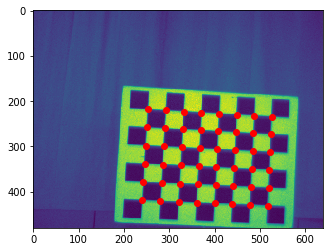

In [279]:
import numpy as np
from imageio import imread
from mat4py import loadmat

# Load the boundary.
bpoly = np.array(loadmat("bounds.mat")["bpolyh1"])

# Load the world points.
Wpts = np.array(loadmat("world_pts.mat")["world_pts"])
SP = np.array(loadmat("saddle_points.mat")["Ipts"])
# Load the example target image.
I = imread("example_target.png")

Ipts = cross_junctions(I, bpoly, Wpts)

# # You can plot the points to check!
print(Ipts)

In [ ]:



# import picture
# harris corner 
# convolution
# show the result in the bound
# show plt



from mat4py import loadmat
import matplotlib.pyplot as plt
%matplotlib inline



def average_point(ori_point):
    distance=4
    #sort column 0 then column 1
    idex = np.lexsort([ori_point[:, 1], ori_point[:, 0]])
    sorted_p = ori_point[idex, :]
    #sorted_p=np.vstack((sorted_p,[0,0]))
    reference=sorted_p[0]
    list_a=[]
    array_48=[]
    for i in range(len(sorted_p)):
        norm=np.linalg.norm(sorted_p[i] - reference)
        if norm <distance and i!=len(sorted_p)-1:
            list_a.append(sorted_p[i])
           
        else :  
            reference=sorted_p[i]
            mean_value= sum(list_a) / float(len(list_a))
            array_48.append(mean_value)
            list_a=[]
            
    array_48=np.array(array_48)        
    return array_48

# part 1.5 

def filter_p(ori_point,I_bin,width,height):
    new_point=[]
    detect_size=3
    
    for i in range(len(ori_point)):
        x=ori_point[i,1]
        y=ori_point[i,0]
        x=int(x)
        y=int(y)
        if x in range(detect_size,width-detect_size) and y in range(detect_size,height-detect_size):
            p_1=I_bin[y-detect_size,x-detect_size]
            p_2=I_bin[y-detect_size,x+detect_size]
            p_3=I_bin[y+detect_size,x+detect_size]
            p_4=I_bin[y+detect_size,x-detect_size]
            if (p_1==p_3) and (p_2==p_4) and (p_2*p_4)!=(p_1*p_3) :
                new_point.append(ori_point[i])
    new_point=np.array(new_point)
    
    return new_point


def saddle(filter_point,I):
    ###implement saddle point 
    #part 2
    # build a small patch for each point
    patch_size=20 # need to be even
    sdpoint_arr=np.empty((0,2)) 
    for i in range(len(filter_point)):
        # saddle point position
        sdpoint_x=filter_point[i][1]
        sdpoint_y=filter_point[i][0]

    #     a1=sdpoint_x-patch_size/2
    #     a2=sdpoint_x+patch_size/2
    #     a3=sdpoint_y-patch_size/2
    #     a4=sdpoint_y+patch_size/2
    #     print(a1,a2,a3,a4)
    #  do the saddle point based on I_binary
        patch=I[int(sdpoint_y-patch_size/2):int(sdpoint_y+patch_size/2),int(sdpoint_x-patch_size/2):int(sdpoint_x+patch_size/2)]
        m, n = patch.shape 
        #clear B
        B=[]
        # x2 xy y2 x y 1 (m,n) begin from 0,0
        A = np.empty((0, 6))
        for x in range(0,n):
            for y in range(0,m):
                A = np.vstack((A, [x ** 2, x * y, y ** 2, x, y, 1.]))
                B.append(patch[y, x])
        # w=(a,b,c,d,e,f) for parameters
        w = np.linalg.lstsq(A, B,rcond=None)[0]
        (a, b, c, d, e, f) = w
        # solve the intersection
        # [2a b],[b 2c]
        C = np.array([[float(2 * a), float(b)], [float(b), float(2 * c)]])
        D = np.array([-d, -e])
        pt = np.linalg.inv(C).dot(D)
        # correct the position of pt
        #print(pt.shape)
        pt=pt-[patch_size/2,patch_size/2]+[sdpoint_x,sdpoint_y]
        pt=pt.reshape((1,2))
        #print(pt)(x,y)
        sdpoint_arr=np.append(sdpoint_arr,pt,axis=0)
        
        #print(sdpoint_arr.shape) #(n,2)
    sdpoint_arr=sdpoint_arr[:, [1,0]]
    return sdpoint_arr



from scipy.ndimage.filters import *

def cross_junctions(I, bounds, Wpts):

    #part one
    #change to binary
    I_binary=np.where(I>100,0,1)
    #gaussian_filter filter
    I_gaussian=gaussian_filter(I,sigma=1)


    I_copy=I.copy()

    # harris corner
    # calculate gradient

    Ix,Iy= np.gradient(I_binary)
    Ix=gaussian_filter(Ix, sigma=1)
    Iy=gaussian_filter(Iy, sigma=1)

    # 2d array
    Ixx = Ix**2
    Ixy = Iy*Ix
    Iyy = Iy**2
    # Ixx=gaussian_filter(Ixx, sigma=2)
    # Ixy=gaussian_filter(Ixy, sigma=2)
    # Iyy=gaussian_filter(Iyy, sigma=2)
    height = I_binary.shape[0] #480
    width = I_binary.shape[1]  #640



    k = np.array([[1,1,1],[1,1,1],[1,1,1]])

    Sxx=convolve(Ixx, k, mode='nearest')
    Sxy=convolve(Ixy, k, mode='nearest')
    Syy=convolve(Iyy, k, mode='nearest')


    det = (Sxx * Syy) - (Sxy**2)
    trace = Sxx + Syy
    r = det - 0.04*(trace**2)

    #array_np = np.array(r)
    low_values_flags = r <0  # Where values are low
    r[low_values_flags] = 0 

    # max=np.amax(r)
    # print(max)

    # print(array_np)(y,x)
    point_array=[]
    ## show the plot
    for i in range(r.shape[0]):
        for j in range(r.shape[1]):
            if r[i,j]!=0:
                #I_copy[i,j]=255 
                point_array.append([i,j])

    point_array=np.array(point_array)
    #I = imread("example_target.png")
    #plt.imshow(I_copy)
    ## change kernal, or change 

    #point_array is integer listxxxx turn to be a numpy array

    # plt.imshow(I)
    # #x, y
    # plt.plot([100,200],[200,300],'ro', color='b',)

    
    # filter point (y,x)
    filter_point=filter_p(point_array,I_binary,width,height)

    #run the function
    #sdpoint(y,x) 

    sdpoint=np.empty((0,2))
    sdpoint=saddle(filter_point,I_gaussian)
#     plt.imshow(I)
#     plt.plot(sdpoint[:,1],sdpoint[:,0],'ro', color='r')

  
    # np.set_printoptions(threshold=np.inf)
    # sdpoint

    # need to sort point !!
    idex = np.lexsort([sdpoint[:, 1], sdpoint[:, 0]])
    sorted_point = sdpoint[idex, :]
    #print(sorted_point)

    final_result=average_point(sorted_point)
#   Ipts  - 2xn np.array of cross-junctions (x, y), relative to the upper
#   left corner of I. These should be floating-point values.

#     plt.imshow(I)
#     plt.plot(final_result[:,1],final_result[:,0],'ro', color='r')
    Ipts=final_result
    
    Ipts = np.zeros((2, 48))
    Ipts=final_result.transpose()[[1, 0]]


    #------------------
    return Ipts





import numpy as np
from imageio import imread
from mat4py import loadmat

# Load the boundary.
bpoly = np.array(loadmat("bounds.mat")["bpolyh1"])

# Load the world points.
Wpts = np.array(loadmat("world_pts.mat")["world_pts"])
SP = np.array(loadmat("saddle_points.mat")["Ipts"])
# Load the example target image.
I = imread("example_target.png")

Ipts = cross_junctions(I, bpoly, Wpts)

# # You can plot the points to check!
print(Ipts)









#keep this part, is important
#part 3 trim the outside point
#

# point=np.empty((0,2))
# for i in range(len(sdpoint)):
#     if sdpoint[i,1]>=0 and sdpoint[i,1]<width and sdpoint[i,0]>=0 and sdpoint[i,0]<height:
#         point=np.vstack((point,sdpoint[i]))
        
# print(point.shape)
# plt.imshow(I)
# # #x, y

# point_1=filter_p(sdpoint,I_binary)
#print(point_1)

# new_point=[]
# detect_size=2
# for i in range(len(sdpoint)):
#     x=sdpoint[i,1]
#     y=sdpoint[i,0]
#     x=int(x)
#     y=int(y)
    
#     if x in range(detect_size,width-detect_size) and y in range(detect_size,height-detect_size):
#         p_1=I_binary[y-detect_size,x-detect_size]
#         p_2=I_binary[y-detect_size,x+detect_size]
#         p_3=I_binary[y+detect_size,x+detect_size]
#         p_4=I_binary[y+detect_size,x-detect_size]

#         if (p_1==p_3) and (p_2==p_4) and (p_2*p_4)!=(p_1*p_3) :
#             new_point.append(sdpoint[i])
            
# n_point=np.array(new_point)


# print(n_point)

# plt.plot(n_point[:,1],n_point[:,0],'ro', color='b')
#plt.plot(point_1[:,1],point_1[:,0],'ro', color='b')
# point.shape



# def boundary_delete(array,bpoly):
#     point_arr=np.empty((0,2))
# #     for i in range(array.shape[0]):
# #          if array[i][0]>bpoly[0][0] and array[i][0]<bpoly[0][1] and array[i][0]>bpoly[0][2] and array[i][0]<bpoly[0][3]:
# #             if array[i][1]>bpoly[1][0] and array[i][1]<bpoly[1][1] and array[i][1]>bpoly[1][2] and array[i][1]<bpoly[1][3]:
# #                 np.append(point_arr,array[i,])
    
#     # line 1 
#     y_1=(y[1,1]-y[1,0])/(x[0,1]-x[0,0])*(x-x[0,1]+y[1,1]  #y_1 should be smaller than y
#     y_2=
#     return point_arr




In [172]:
#keep this part, is important
#part 3 trim the outside point
#

# point=np.empty((0,2))
# for i in range(len(sdpoint)):
#     if sdpoint[i,1]>=0 and sdpoint[i,1]<width and sdpoint[i,0]>=0 and sdpoint[i,0]<height:
#         point=np.vstack((point,sdpoint[i]))
        
# print(point.shape)
# plt.imshow(I)
# # #x, y

# point_1=filter_p(sdpoint,I_binary)
#print(point_1)

# new_point=[]
# detect_size=2
# for i in range(len(sdpoint)):
#     x=sdpoint[i,1]
#     y=sdpoint[i,0]
#     x=int(x)
#     y=int(y)
    
#     if x in range(detect_size,width-detect_size) and y in range(detect_size,height-detect_size):
#         p_1=I_binary[y-detect_size,x-detect_size]
#         p_2=I_binary[y-detect_size,x+detect_size]
#         p_3=I_binary[y+detect_size,x+detect_size]
#         p_4=I_binary[y+detect_size,x-detect_size]

#         if (p_1==p_3) and (p_2==p_4) and (p_2*p_4)!=(p_1*p_3) :
#             new_point.append(sdpoint[i])
            
# n_point=np.array(new_point)


# print(n_point)

# plt.plot(n_point[:,1],n_point[:,0],'ro', color='b')
#plt.plot(point_1[:,1],point_1[:,0],'ro', color='b')
# point.shape



In [ ]:
# def boundary_delete(array,bpoly):
#     point_arr=np.empty((0,2))
# #     for i in range(array.shape[0]):
# #          if array[i][0]>bpoly[0][0] and array[i][0]<bpoly[0][1] and array[i][0]>bpoly[0][2] and array[i][0]<bpoly[0][3]:
# #             if array[i][1]>bpoly[1][0] and array[i][1]<bpoly[1][1] and array[i][1]>bpoly[1][2] and array[i][1]<bpoly[1][3]:
# #                 np.append(point_arr,array[i,])
    
#     # line 1 
#     y_1=(y[1,1]-y[1,0])/(x[0,1]-x[0,0])*(x-x[0,1]+y[1,1]  #y_1 should be smaller than y
#     y_2=
#     return point_arr